# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [181, 183, 85]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,112151,29627,18148,16745,4948,8550
1,36847,43950,20170,36534,239,47943
2,16117,46197,92780,1026,40827,2944


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 3071.9
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:**

<table>
    <tr><td>No</td><td>sample index</td><td>max category value</td><td>establishment</td></tr>
    <tr><td>0</td><td>181</td><td>fresh=112151</td><td>markets</td></tr>
    <tr><td>1</td><td>183</td><td>delicatessen=47943</td><td>restaurants</td></tr>
    <tr><td>2</td><td>85</td><td>grocery=92780</td><td>retailers</td></tr>
</table>
<br/>
Sample 0 (index 181) establishment is markets, as the 'fresh' value 112151 is the hightest of the 6 categories, and much higher than the 'fresh' mean of 12000.3
<br/>
Sample 1 (index 183) establishment is restaurants, as the 'delicatessen' value 47943 is the hightest of the 6 categories, and much higher than the 'delicatessen' mean 1524.8
<br/>
Sample 2 (index 85) establishment is retailers, as the 'grocery' value 92780 is the hightest of the 6 categories, and much higher than than 'grocery' mean 3071.9

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [5]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Y label
label_column = 'Milk' 

data_copy = data.copy()
new_data_label = data_copy[label_column]
new_data = data_copy.drop(label_column, axis = 1)

# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_data, 
                                                    new_data_label, 
                                                    test_size = 0.25, 
                                                    random_state = 0)

# TODO: Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=0)
y_predict = regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print label_column, 'prediction accuracy score:', score

Milk prediction accuracy score: 0.365725292736


### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**

<strong>Which feature did you attempt to predict?</strong><br/>
Milk <br/>
<br/>
<strong>What was the reported prediction score?</strong><br/>
0.36572529273630905 <br/>
(I expected a higher value)<br/>
<br/>
<strong>Is this feature necessary for identifying customers' spending habits?</strong><br/>
Yes, I think milk is part of grocery, so i expect in most cases/data both grocery and milk are correlated. <br/>
<br/>

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

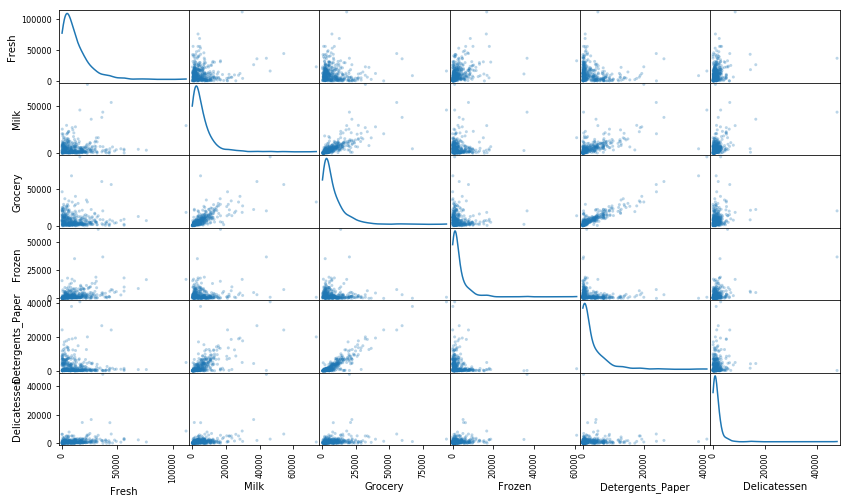

In [6]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

**Answer:**

<strong>Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.</strong><br/>
All data are skewed either to x-axis or y-axis or both, or skewed in the possible principle component, there are almost no data in the middle of the graph.<br/>
   Fresh   - lots of data points are close to zero, spread more along the x-axis, outliers average about 5-6, the data distributions are roughly the same on all plots.<br/>
   Milk    - there are less data points close to zero, spread less along the x-axis, outliers average about 10, the data distributions have different 'shapes'.<br/>
   Grocery - the pattern visually have similar characteristics to Milk, correlation (principle component) clearly identifiable on Detergents_paper.<br/>
   Frozen  - data points are close to zero on either x-axis or y-axis, outliers count average about 3-4.<br/>
   Detergents_paper - correlation (principle component) clear visible on Grocery and milk, outliers about 5 on average. <br/>
   Delicatessen - data points are more cencentrate on y-axis, and plots are almost the same distributions.<br/>
  
<strong>Are there any pairs of features which exhibit some degree of correlation? </strong><br/>
Yes, the features 'Grocery' and 'Detergents_Paper' have a line shape diagonally, a possible princple component with large variance.<br/>
Almost none of the data points is sitting close to zero the on x-axis or y-axis. which means one affected another in a significant way.<br/>
Looking at the graph, the two features (product categories) almost have 1:1 ratio in value. <br/>

<strong>Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? </strong><br/>
Yes, this confirms the relevance of the features I am looking at - Grocery -> predicts -> Milk.<br/>
<br/>

<strong>How is the data for those features distributed? </strong><br/>
Hint: Is the data normally distributed? Where do most of the data points lie?<br/>
The data is not normally distributed, most of the data points are close the first princple component, capturing the pattern of the data, at almost y = 1x <br/>
<br/>

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

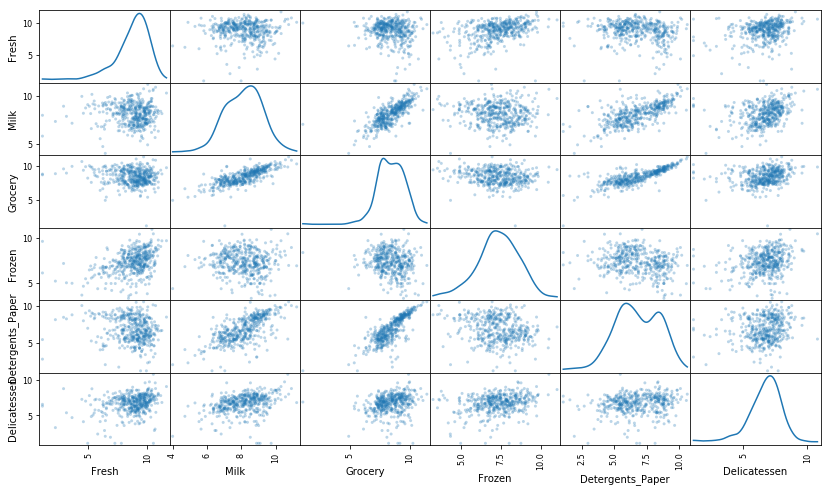

In [7]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [ ]:
# Display the log-transformed sample data
display(log_samples)

<strong>Observation Result</strong>

From the feature scaling plot observation above, the pair of features Grocery and Milk, the correlation is still present and it is now weaker than before, because the data points are now more spread in the space, making the data points further away from the 1st principle component.

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [11]:
# For each feature find the data points with extreme high or low values

all_outlier_data = pd.DataFrame()

for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25.)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75.)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    IQR = Q3 - Q1
    step = IQR * 1.5
    
    # Display the outliers
    outlier_data = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    all_outlier_data = all_outlier_data.append(outlier_data)
    
    print "Data points considered outliers for the feature '{}': {}".format(feature, len(outlier_data))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = []

# all indexes in dataframe, some indexes overlapped
outliers = all_outlier_data.index.values 
# for easy manually inspection in console
outliers.sort() 

# outlier contains index 183, one of my chosen sample data point establishement
# omit from outlier list to preserve in good data 
retain_choice = 183
retain_array_indices = np.argwhere(outliers == retain_choice)
outliers = np.delete(outliers, retain_array_indices)

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)


Data points considered outliers for the feature 'Fresh': 16


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk': 4


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery': 2


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen': 10


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper': 2


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen': 14


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


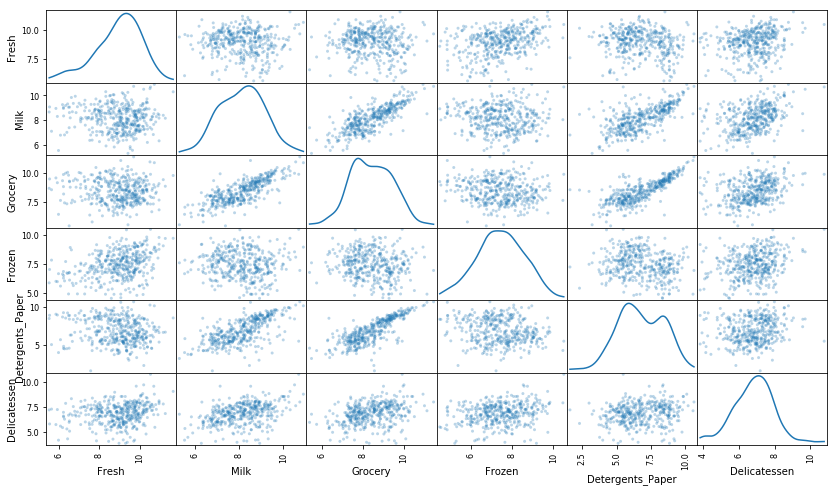

In [12]:
# Analysis - plot the good data, after outlier has been removed, check scale as outlier affect scale
pd.scatter_matrix(good_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
# yes, massive difference, all data points now more centralized in space

### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:**

<strong>Are there any data points considered outliers for more than one feature based on the definition above? </strong>
<br/>
Yes, there are outliers on all 6 features </br/>

<table>
    <tr><th>Features</th><th>No of Outliers</th></tr>
    <tr><td>Fresh</td><td>16</td></tr>
    <tr><td>Milk</td><td>04</td></tr>
    <tr><td>Grocery</td><td>02</td></tr>
    <tr><td>Frozen</td><td>10</td></tr>
    <tr><td>Detergents_Paper</td><td>02</td></tr>
    <tr><td>Delicatessen</td><td>14</td></tr>
    <tr style='color:red'><td>Total</td><td>48</td></tr>
</table>
 			

<strong>Should these data points be removed from the dataset? </strong><br/>
Yes, by removing the outliers the data will be less skewed, and data will be more normally distributed.
<br/>

<strong>If any data points were added to the outliers list to be removed, explain why</strong><br/>
There is no extra data points added to the outlier list.</br>

I have replot the scatter with good data and compared results with log_data.<br/>
Remove outlier does indeed improves feature scaling, visually the data points in good_data all clustered at the centre.<br/>
The original log_data is skewed to the side by the outliers.<br/>
I have retained one outlier, index 183, as it is one of the three sample data points i have chosen.<br/>


## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

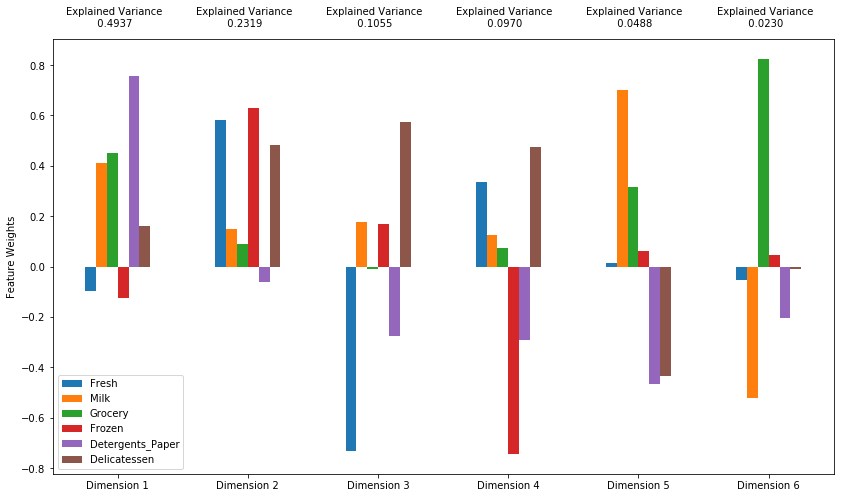

In [13]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA

pca = PCA(n_components=6)
pca.fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**

<strong>How much variance in the data is explained in total by the first and second principal component? </strong><br/>

Principal component 1st - Explained Variance 0.4937<br/>
Principal component 2nd - Explained Variance 0.2319<br/>
<br/>
Principal component 1st + 2nd = Total <br/>
0.4937 + 0.2319 	  = 0.7256<br/>
<br/>

<strong>How much variance in the data is explained by the first four principal components? </strong><br/>

Principal component 1st - Explained Variance 0.4937<br/>
Principal component 2nd - Explained Variance 0.2319<br/>
Principal component 3rd - Explained Variance 0.1055<br/>
Principal component 4th - Explained Variance 0.0970<br/>
<br/>
Principal component 1st + 2nd + 3rd + 4th = Total<br/>
0.4937 + 0.2319 + 0.1055 + 0.0970 = 0.9281<br/>
<br/>

<strong>Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.</strong><br/>
<br/>
1st principal component - dimension 1<br/>
the highest feature weight just below 0.8 on Detergent_Paper, with Grocery and Milk just above 0.4 <br/>
This group of customers most likely shop in retailer (supermarkets) and grocery store for all their needs.<br/>
<br/>
2nd principal component - dimension 2 <br/>
the highest feature weight just above 0.6 on Frozen, with Fresh 0.6 and Delicatessen close to 0.5<br/>
This group of customers likes fresh fruit and veg in markets, frozen food, also often eat at restaurants.<br/>
<br/>
3rd principal component - dimension 3<br/>
the highest feature weight about 0.6 on Delicatessen, and negative feature weight about -0.7 on Fresh<br/>
This group of customers dont eat fresh produce, it does not spend much on grocery either, they are probably a busy worker which dont have time to visit retailer (supermarkets). They probably always eat out, probably single / no children, with big disposable income.<br/>
<br/>
4th principal component - dimension 4<br/>
the highest feature weight above 0.4 on Delicatessen, and negative feature weight close to 0.8 on Frozen <br/>
This group of customers do not like to buy frozen food, spend little on grocery, not a fan of retailer (supermarkets), but spend high on restaurants and like fresh produce from local markets.<br/>
<br/>


### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [14]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,2.6441,4.4300,-0.4005,0.1360,0.3648,-0.4041
1,0.8434,5.3551,2.4403,0.9423,1.3694,0.1803
2,5.5275,1.1168,-0.5868,0.6129,0.4711,0.2640


<strong>Observation Result</strong>

From Observation above, the result is not what i have expected, the Dimension best valued product is not the same as the initial interpretation of establishments. I think i am missing something here, but since there is no question here to answer, i will continue to next step.

<DIV>
    <table>
    <tr><td>No</td><td>sample index</td><td>max category value</td><td>establishment</td><td style='border-left:black 1px solid'>Dimension with highest log value</td><td>Dimension highest feature weight product</td><td style='font-weight:bold'>consistent?</td></tr>
    <tr><td>0</td><td>181</td><td>fresh=112151</td><td>markets</td><td style='border-left:black 1px solid'>2(4.4300)</td><td>2=Frozen</td><td style='background-color:pink'>No</td></tr>
    <tr><td>1</td><td>183</td><td>delicatessen=47943</td><td>restaurants</td><td style='border-left:black 1px solid'>2(5.3551)</td><td>2=Frozen</td><td style='background-color:pink'>No</td></tr>
    <tr><td>2</td><td>85</td><td>grocery=92780</td><td>retailers</td><td style='border-left:black 1px solid'>1(5.5275)</td><td>1=Detergents_Paper</td><td style='background-color:pink'>No</td></tr>
</table>
</DIV>

### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [19]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [20]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,2.6441,4.4300
1,0.8434,5.3551
2,5.5275,1.1168


<strong>Observation Result</strong>

From observation above, the result is good, matched observation description, the first two dimensions values remains unchanged when compared to a PCA transformation in six dimensions.

## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

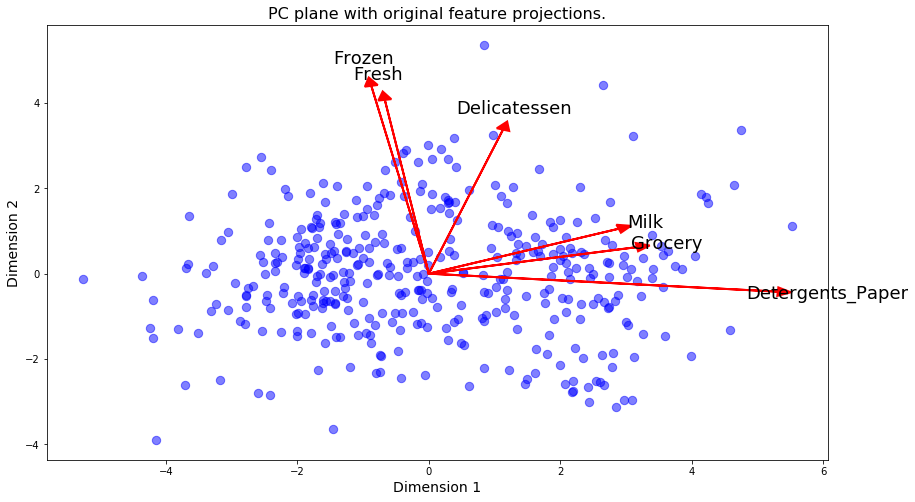

In [21]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

<strong>Observation Result</strong>

<strong>which of the original features are most strongly correlated with the first component? </strong><br/>
Detergents_Paper, Grocery, Milk

<strong>What about those that are associated with the second component? </strong><br/>
Frozen, Fresh, Delicatessen

<strong>Do these observations agree with the pca_results plot you obtained earlier? </strong><br/>
Yes the observations agreed.

(Compare with answer from Question 5)<br/>
1st principal component - dimension 1 <br/>
the highest feature weight just below 0.8 on Detergent_Paper, with Grocery and Milk just above 0.4 <br/>
2nd principal component - dimension 2 <br/>
the highest feature weight just above 0.6 on Frozen, with Fresh 0.6 and Delicatessen close to 0.5 <br/>

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**

<strong>What are the advantages to using a K-Means clustering algorithm? </strong><br/>

- One of the simplest algorithm for unsupervised clustering, easy to implement, fast and efficient.
- Easy to interpret the clustering results
- Hard clustering, ideal for no data points shared between 2 clusters

Ref 1 - https://www.quora.com/What-are-the-advantages-of-K-Means-clustering<br/>
Ref 2 - Udacity MLND Unsupervised Learning lessons<br/>

<strong>What are the advantages to using a Gaussian Mixture Model clustering algorithm? </strong><br/>

- GMM is more flexible than K-Means, where K-Means is a special case of GMM
- Each cluster can have unconstrained covariance structure
- Soft clustering, GMM model allow overlapping of data points in more than one clusters, mixed membership

Ref 1 - https://www.quora.com/What-are-the-advantages-to-using-a-Gaussian-Mixture-Model-clustering-algorithm<br/>
Ref 2 - Udacity MLND Unsupervised Learning lessons<br/>

<strong>Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why? </strong><br/>

There is no one cluster to classify one customer spending habits, each customer spending is spread across unevenly into almost more than one features / dimensions.<br/>
I will choose Gaussian Mixture Model clustering, as it is good for mixed membership, I assumed this is similar to soft clustering.<br/>


### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [28]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn import mixture, metrics

clusterer = mixture.GMM(n_components=2)
clusterer.fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.means_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = metrics.silhouette_score(reduced_data, preds)

#n_components   silhouette_score
#2              0.43826357057113297 (selected for the rest of the project)
#3              0.36783606385694601
#4              0.2970442289970065
#5              0.25980086536347913
#6              0.31924115106450851

I have select 2 clusters (n_components=2), as it have the highest silhouette score.

### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**

<strong>Report the silhouette score for several cluster numbers you tried.</strong><br/>

<table>
    <tr><td style='width:200px; text-align:center'>clusters</td><td>silhouette_score</td></tr>
    <tr><td style='text-align:center'>2</td><td>0.43826357057113297</td></tr>
    <tr><td style='text-align:center'>3</td><td>0.36783606385694601</td></tr>
    <tr><td style='text-align:center'>4</td><td>0.2970442289970065</td></tr>
    <tr><td style='text-align:center'>5</td><td>0.25980086536347913</td></tr>
    <tr><td style='text-align:center'>6</td><td>0.31924115106450851</td></tr>
</table>
<br />

<strong>Of these, which number of clusters has the best silhouette score?</strong><br/>

Two clusters has the best silhouette score 0.438

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

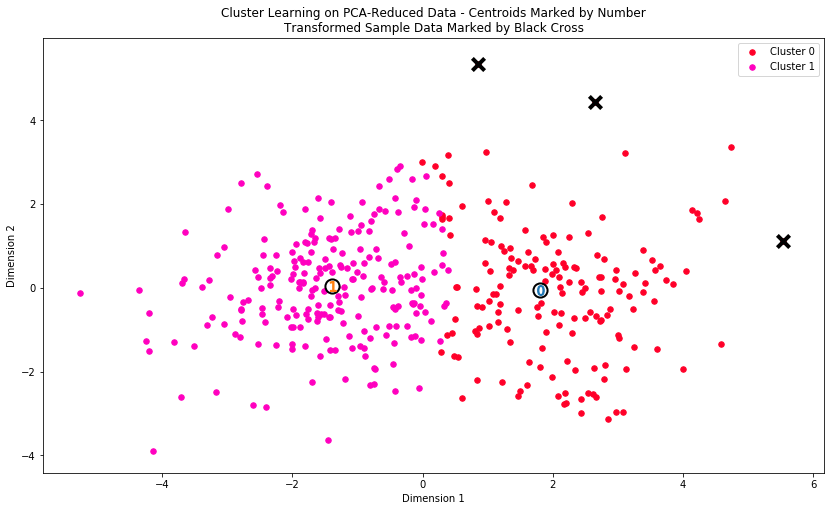

In [25]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [26]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,6236.0,7068.0,10219.0,1316.0,3472.0,1186.0
Segment 1,8879.0,1919.0,2433.0,2066.0,307.0,738.0


### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:**

<strong>What set of establishments could each of the customer segments represent?</strong><br/>
There are two clusters (customer segments).<br/>

<table>
    <tr><td>Cluster</td><td>Establishments</td></tr>
    <tr><td>Segment 0</td><td>Grocery, Milk, Fresh</td></tr>
    <tr><td>Segment 1</td><td>Fresh</td></tr>
</table>
<br/>
Segment 0 customers have a lot more spending power then Segment 1<br/>
Segment 0 - total spending value is 29497.0<br/>
Segment 1 - total spending value is 16342.0<br/>
<br/>

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [27]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 0


**Answer:**

<strong>For each sample point, which customer segment from Question 8 best represents it?</strong><br/>

<table>
    <tr><td>Sample point</td><td>index</td><td>cluster (customer segment)</td></tr>
    <tr><td>0</td><td>181</td><td>0</td></tr>
    <tr><td>1</td><td>183</td><td>0</td></tr>
    <tr><td>2</td><td>85</td><td>0</td></tr>
</table>
<br/>

All 3 samples i selected in Question 1 are in Cluster 0<br/>


<strong>Are the predictions for each sample point consistent with this?*</strong><br/>

from Question 1<br/>
<table>
    <tr><td>Sample point</td><td>index</td><td>column</td><td>establishment</td><td style='border-left:black 1px solid'>consistent with cluster?</td></tr>
    <tr><td>0</td><td>181</td><td>fresh=112151</td><td>markets</td><td style='border-left:black 1px solid; background-color: #93FF93'>Yes (Segment 0 'Fresh' have a high value)</td></tr>
    <tr><td>1</td><td>183</td><td>delicatessen=47943</td><td>restaurants</td><td style='border-left:black 1px solid; background-color: pink'>No - Segment 0 'Delicatessen' have low value 1186.0</td></tr>
    <tr><td>2</td><td>85</td><td>grocery=92780</td><td>retailers</td><td style='border-left:black 1px solid; background-color: #93FF93'>Yes (Segment 0 'Grocery' have a high value)</td></tr>
</table>
<br/>

<div style='font-style: italic'>Analysis</div>
I think sample index 183 inconsistent might be caused by the number of clusters i have selected: 2<br/>
Given a higher number of clusters, there should be a new customer segment that have a high value of Delicatessen, and low value on other product categories.<br/>



## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

<strong>How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*</strong><br/>
The wholesale distributor can apply the new delivery service to only 50% of the customers.<br/>
Group A - selected 50% of the customers randomly, use the old delivery schedule 5 days a week.<br/>
Group B - the other 50%, use the new delivery schedule 3 days a week.<br/>
Make sure the total spending value of both groups are equal or above 99.99%, if not, then randomly select customers again.<br/>
Then observe the changes in each customer segments over time.<br/>

For each customer:<br/>
reacted positively - if the overall spending of their products have increased<br/>
reacted negatively - if the overall spending of their products have decreased<br/>
reacted negatively? - if the overall spending of their products is unchanged, but the establishments is been swifted from one to another.<br/> 

Overall (all customers)<br/>
Positive  - if the total value of all customers spending increased<br/>
Negsitive - if the total value of all customers spending decreased<br/>

Analysis<br/>
I would say observe the changes in customer segment for at least 12 months, even if the result is initially positive for the first couple of months.<br/>
This is because the customer shopping behaviour is likely affected by the seasons, unexpected events, but these will be neutralized by a longer period of time. <br/>
e.g. tesco horsemeat scandal, contaminated eggs etc<br/>
But if there is a dramatic decrease in customers in Group B which uses the new 3 days a week delivery schedule, then immediate action is needed to revert the delivery schedule back to 5 days a week, to minimize losses. <br/>

<strong>Can we assume the change affects all customers equally?</strong><br/>
No the affects will not be equal to all customers, because each customer have different lifestyle, spending power and daily schedule.<br/>
The clusters (customer segments) we have so far in the project only tells us about which products each customer want, but do not give details on what time and day they shop, and how often they shop, where they shop.<br/>

<strong>How can we determine which group of customers it affects the most?</strong><br/>

Before the delivery schedule change - prediction:<br/>
we can make a guess that the food most people need daily will have the most impact.
Food item like bread and milk are the products people need daily, a normal family of 4 will likely to consume these everyday, and likely be affected if the milk and bread is now only be deliver every 2 days.<br/>
<br/>
After the delivery schedule change - observe the changes in clusters:<br/>
<br/>
  compare the total spending value between customers Group A and Group B.<br/>
  if Group B total spending value is different to Group A significantly, then we know it is affected.<br/>
  <br/>
  compare before and after the delivery schedule changed in all cluster customer segments.<br/>
  if Group B total spending value changed significantly, then we know it is affected.<br/>
  <br/>
  count the number of data points in each cluster customer segemnts.<br/>
  a large change/swift in data points from one cluster to another will also signal an impact.<br/>
  positive or negative again depends on the total customers spending value.<br/>
<br/>
The group of customers it affects the most is the cluster with the most changed data points, and the highest increase/decrease in total spending value.<br/>

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

<strong>How can the wholesale distributor label the new customers using only their estimated product spending and the customer segment data?</strong><br/>
    
The wholesale distributor can use a Supervised Learning Classifier to label the 10 new customers.<br/>
This is clearly a classfier problem, not a regression, as we are classifing a customer to a customer segment.<br/>

A list of Supervised Learning Models from previous module in this course:<br/>
- Gaussian Naive Bayes (GaussianNB)<br/>
- Decision Trees<br/>
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)<br/>
- K-Nearest Neighbors (KNeighbors)<br/>
- Stochastic Gradient Descent Classifier (SGDC)<br/>
- Support Vector Machines (SVM)<br/>
- Logistic Regression<br/>

I do not know which supervised learning model is best for this problem, but i would choose 'Support Vector Machines (SVM)' as a good start for this problem, and possibly run a few of them and compare the accuracy score.<br/>
The original customers data will be used for training the supervised learning model, split 80% for training and 20% to validating the model<br/>
Then the 10 New customers then can be classify using the trained model.<br/>

<strong>Input X (features)</strong> will be the 6 product categories<br/>
Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicatessen<br/>	

<strong>Target Y (label)</strong> will be the index of each of the cluster customer segments<br/>
since i have selected only 2 clusters in Question 9, the target Y variables are:<br/>
0, 1

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

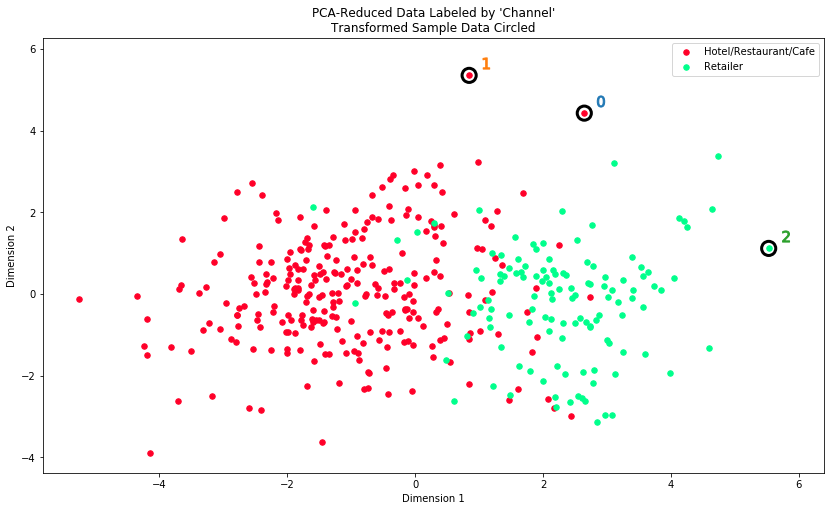

In [30]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**

<strong>How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers?</strong><br/>
The two looks remarkably similar, both have 2 clusters with similar centers, about 90% visually the same.<br/>
The new plot (Hotel/Restaurant/Cafe + Retailer) have some data points overlaps between the 2 clusters, about 8 Retailer data points overlapped into Hotel/Restaurant/Cafe, and 28 data points from Hotel/Restaurant/Cafe cluster overlapped into Retailer cluster.<br/>
I assume this is 'unconstrained covariance structure', an advantage in GMM.<br/>

<strong>Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution?</strong><br/>
A. None but almost! as there are only 2 clusters and overlap data points exist, so not exactly 'pure', but visually the clustering algorithm have produced a plot looks almost the same to the new Hotel/Restaurant/Cafe Retailer plot.<br/>

<strong>Would you consider these classifications as consistent with your previous definition of the customer segments?</strong><br/>
No, but if the plots were a little better, overlapped datapoints do not exist, then i would say yes it is consistent to the previous definition of customer segments.<br/>


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.